# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [3]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [4]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
df = df_orig.loc[df_orig['pop_dens'] <= 5000]

### Shape (number of rows and colums)

In [5]:
# Number of rows and columns
print(df.shape)

(786, 16)


### Data types

In [6]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [7]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,47.407331,8.600386,186.862595,3.421756,92.426209,0.012723,2649.339695,33.336489,161145.898219,2503.950703,177328.709924,27.771168,80631.662280
std,0.085343,0.117298,81.404652,1.304543,75.786527,0.112146,1289.074423,17.141739,186630.497367,1748.039181,223745.725478,7.592012,14393.861209
min,47.195290,8.367652,1.000000,1.000000,8.000000,0.000000,10.000000,0.040000,698.000000,87.959866,129.000000,7.547170,62000.541872
25%,47.361061,8.518511,121.000000,2.500000,63.000000,0.000000,1842.250000,23.302500,8775.000000,1044.628957,3460.000000,24.535004,71059.805603
50%,47.395105,8.562069,230.000000,3.500000,86.000000,0.000000,2391.000000,27.950000,27746.000000,1662.597326,19226.000000,28.059994,82404.831614
75%,47.481115,8.710458,261.000000,4.500000,108.750000,0.000000,3056.750000,38.125000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.915933,298.000000,8.500000,1633.000000,1.000000,9950.000000,149.900000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


In [50]:
df=df.loc[(df['price_per_m2']>= 10) & (df['area']<=150)]
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income,var
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,47.405968,8.599923,187.830832,3.267394,82.222374,0.012278,2529.813097,34.117681,162771.054570,2538.894628,179242.839018,28.092167,80382.374303,-0.134639
std,0.084096,0.118268,80.947084,1.169157,31.467885,0.110200,1131.283962,17.215565,186973.910848,1738.778918,224239.090064,7.463828,14168.144490,0.415217
min,47.195290,8.367652,1.000000,1.000000,8.000000,0.000000,86.000000,10.750000,698.000000,87.959866,129.000000,7.669214,62000.541872,-1.114000
25%,47.360294,8.517454,121.000000,2.500000,61.000000,0.000000,1820.000000,23.740000,9345.000000,1044.628957,4271.000000,24.535004,70964.087938,-0.414667
50%,47.395889,8.561259,230.000000,3.500000,82.000000,0.000000,2315.000000,28.220000,27746.000000,1662.597326,19226.000000,29.031369,82240.228013,-0.137573
75%,47.480068,8.711240,261.000000,4.500000,103.000000,0.000000,2950.000000,38.560000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704,0.139521
max,47.693893,8.915933,298.000000,6.500000,150.000000,1.000000,9950.000000,149.900000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050,0.759684


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [51]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 733 Min: 86.0 Max: 9950.0 Mean: 2529.8 Median: 2315.0 Std: 1131.3
Area: Count: 733 Min: 8.0 Max: 150.0 Mean: 82.2 Median: 82.0 Std: 31.5


### Skewness

In [52]:
df[['price','rooms', 'area']].skew()

price    2.285485
rooms   -0.092933
area    -0.041929
dtype: float64

### Kurtosis

In [53]:
df[['price','rooms', 'area']].kurtosis()

price    9.028504
rooms   -0.412051
area    -0.422629
dtype: float64

### Extreme values

In [54]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income,var


In [55]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income,var
11,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich,2.0,32.0,0,3515.0,109.84,420217,4778.994655,491193.0,32.458468,82932.737704,-0.797321
20,1693998214-82,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3790.0,126.33,420217,4778.994655,491193.0,32.458468,82932.737704,-0.823711
21,1693998214-83,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,25.0,0,3490.0,139.60,420217,4778.994655,491193.0,32.458468,82932.737704,-0.889686
107,1693998280-434,"Neugasse 40, 8005 Zürich, ZH",47.382469,8.530180,261,Zürich,1.0,11.0,0,1120.0,101.82,420217,4778.994655,491193.0,32.458468,82932.737704,-1.074415
154,1693998305-585,"Steinstrasse 35, 8003 Zürich, ZH",47.366997,8.520324,261,Zürich,1.0,15.0,0,1500.0,100.00,420217,4778.994655,491193.0,32.458468,82932.737704,-1.021636
171,1693998309-621,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3890.0,129.67,420217,4778.994655,491193.0,32.458468,82932.737704,-0.823711
185,1693998317-658,"8004 Zürich, ZH",47.380417,8.525352,261,Zürich,1.0,10.0,0,1499.0,149.90,420217,4778.994655,491193.0,32.458468,82932.737704,-1.087610


### Get a list of categories of categorical variable

In [56]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Bülach', 'Dielsdorf', 'Dietikon', 'Dietlikon',
       'Dättlikon', 'Dübendorf', 'Dürnten', 'Egg', 'Eglisau', 'Elsau',
       'Embrach', 'Fehraltorf', 'Feuerthalen', 'Fällanden', 'Glattfelden',
       'Gossau (ZH)', 'Greifensee', 'Hedingen', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hittnau', 'Hochfelden', 'Hombrechtikon',
       'Höri', 'Hüttikon', 'Kloten', 'Knonau', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Mönchaltorf',
       'Neerach', 'Neftenbach', 'Niederglatt', 'Niederhasli',
       'Niederweningen', 'Nürensdorf', 'Oberengstringen', 'Oberglatt',
       'Obfelden', 'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon',
       'Ossingen', 'Pfungen', 'Pfäffikon', 'Regensdorf', 'Rheinau',
       'Richterswil', 'Rickenbach (ZH)', '

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [57]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5
luxurious,,,,,,,,,,,,
0,51,36,39,135,44,198,27,154,3,32,1,4
1,0,0,0,6,0,3,0,0,0,0,0,0


### Pivot tables

In [58]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            51   29.490196    51  1277.058824           51  50.814902
1.5   0            36   35.333333    36  2110.166667           36  65.455000
2.0   0            39   54.589744    39  2155.846154           39  42.528462
2.5   0           135   66.800000   135  2382.755556          135  37.010000
      1             6   72.166667     6  3339.500000            6  45.978333
3.0   0            44   68.159091    44  1964.022727           44  28.677955
3.5   0           198   89.015152   198  2608.818182          198  29.389545
      1             3  101.666667     3  6036.666667            3  59.826667
4.0   0            27   93.222222    27  2828.370370           27  30.204444
4.5   0           154  111.753247   154  2981.415584          154  26.375519
5.0   0             3  108.000000     3  2881.666667            3  26.376667
5.5   0            32  132.406250    32  3283.781250           32  24.717188
6.0   0             1  150.000000     1  4800.000000            1  32.000000
6.5   0             4  136.500000     4  3091.750000            4  22.405000

### Correlation matrix

In [59]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.983609,0.270853,-0.625827,-0.733133,-0.788890
area,0.983609,1.000000,0.439964,-0.474960,-0.598492,-0.665161
price,0.270853,0.439964,1.000000,0.581289,0.455891,0.377620
price_per_m2,-0.625827,-0.474960,0.581289,1.000000,0.989036,0.972736
pop_dens,-0.733133,-0.598492,0.455891,0.989036,1.000000,0.996284
frg_pct,-0.788890,-0.665161,0.377620,0.972736,0.996284,1.000000


### Covariance matrix

In [60]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.366927,31.437725,5.124223e+02,-9.899727,-7.121889e+02,-2.242016
area,31.437725,990.227805,1.892190e+04,-275.791915,-1.673059e+04,-53.885486
price,512.422313,18921.898177,1.279803e+06,6098.817653,6.084653e+05,975.066534
price_per_m2,-9.899727,-275.791915,6.098818e+03,296.375669,1.759739e+04,39.884509
pop_dens,-712.188908,-16730.592744,6.084653e+05,17597.389076,3.023352e+06,8322.786417
frg_pct,-2.242016,-53.885486,9.750665e+02,39.884509,8.322786e+03,55.708725


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

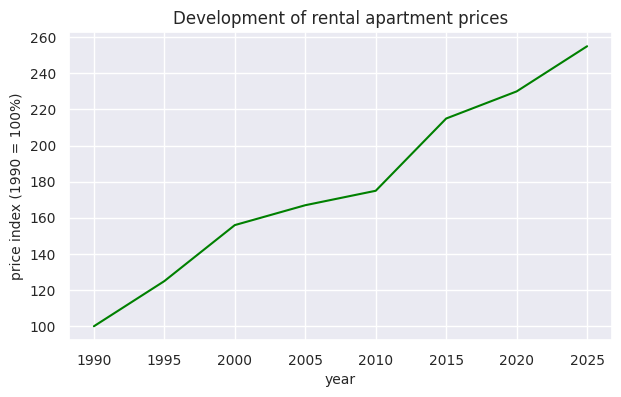

In [61]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

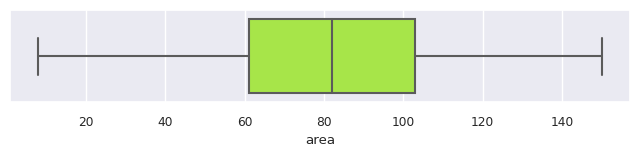

In [62]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

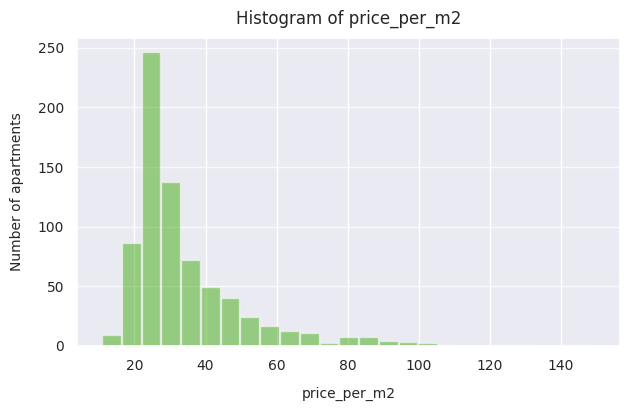

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

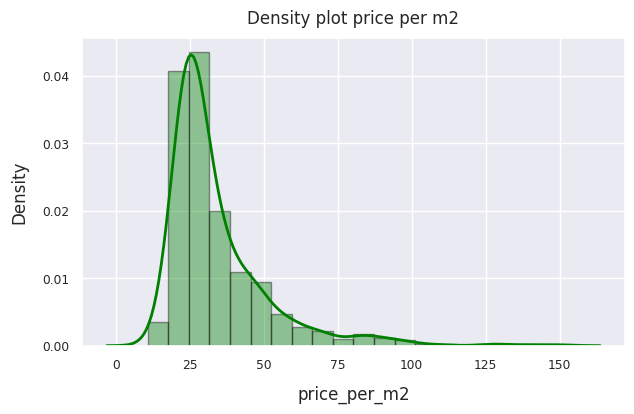

In [64]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
682    8.0 -2.358671
185   10.0 -2.295114
107   11.0 -2.263335
190   14.0 -2.168000
154   15.0 -2.136222
..     ...       ...
290  150.0  2.153867
510  150.0  2.153867
689  150.0  2.153867
621  150.0  2.153867
502  150.0  2.153867

[733 rows x 2 columns]


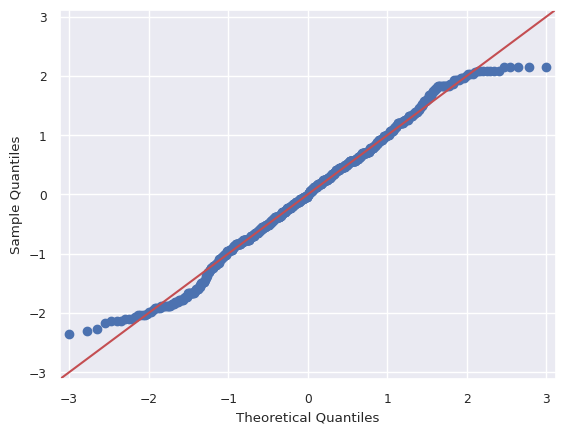

In [65]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [66]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[6.0, 5.0, 6.5, 4.0, 5.5, 1.5, 2.0, 3.0, 1.0, 2.5, 4.5, 3.5]

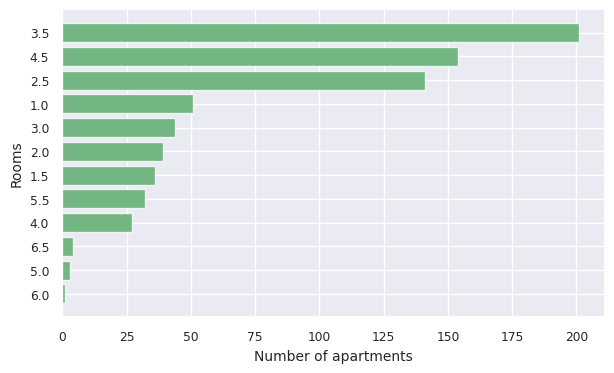

In [67]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

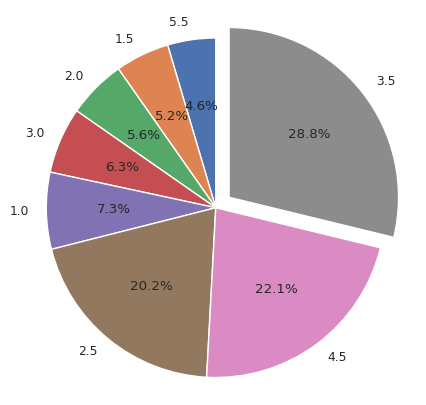

In [68]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

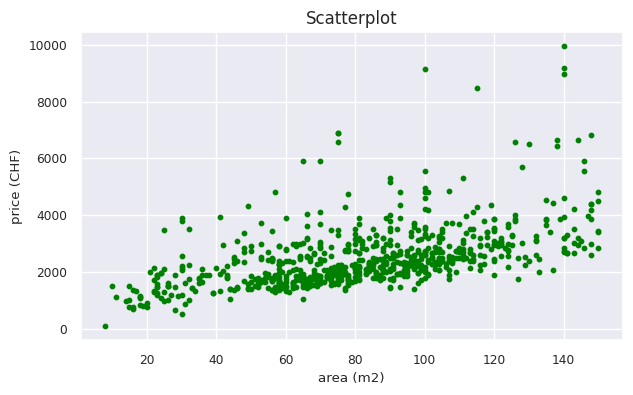

In [69]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(719, 17)
18.337769701291812
1034.3474889300423


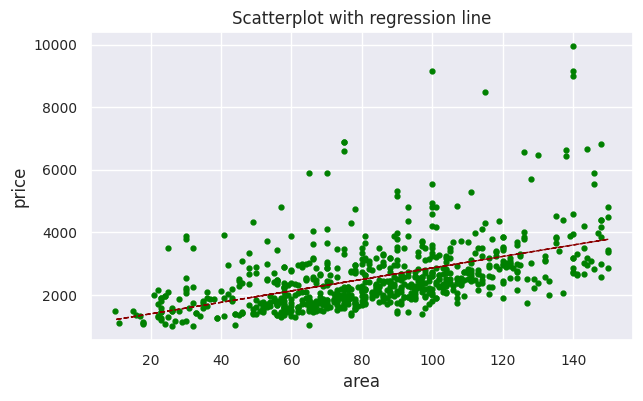

In [70]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

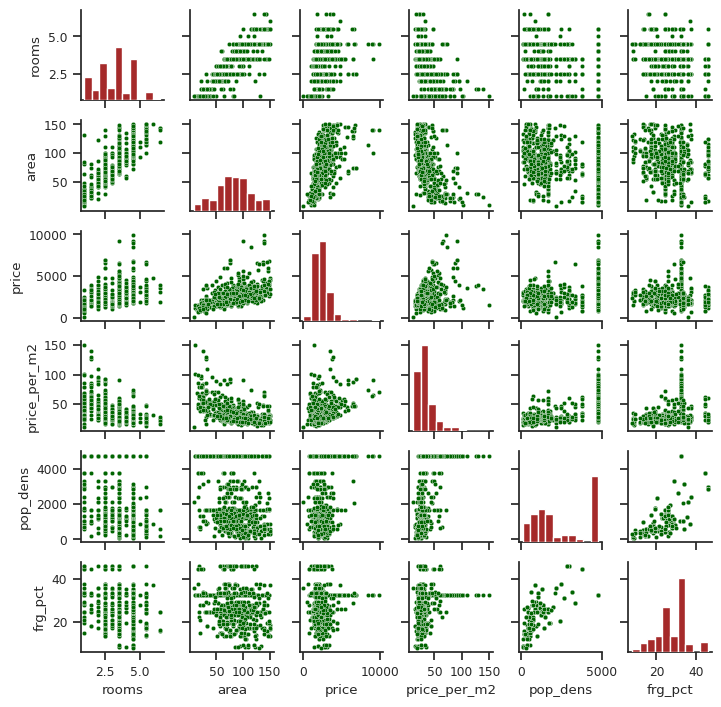

In [71]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(719, 17)


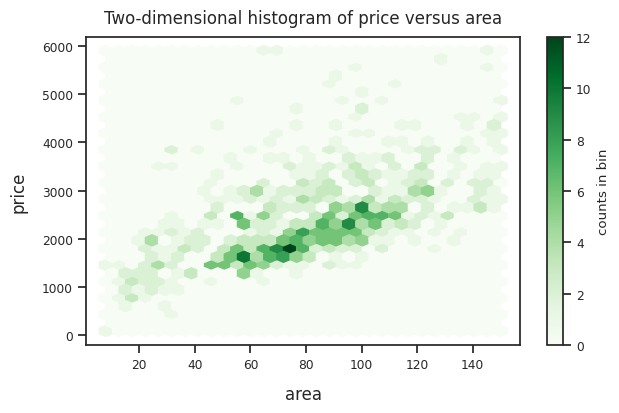

In [72]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

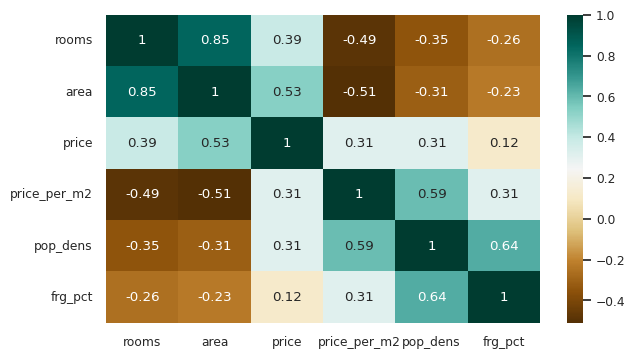

In [73]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

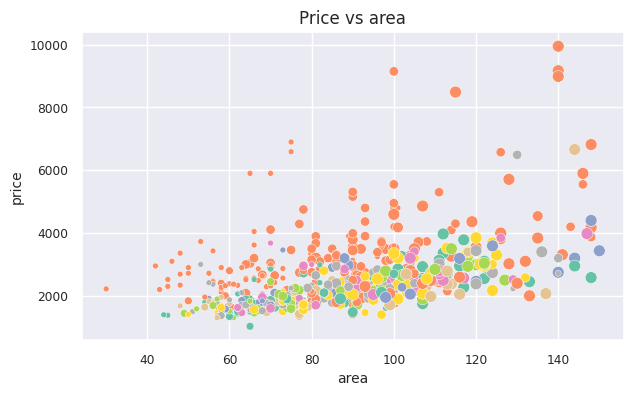

In [74]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [75]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1014-azure
Datetime: 2023-10-13 16:47:31
Python Version: 3.10.13
-----------------------------------
